<a href="https://colab.research.google.com/github/partha1189/machine_learning/blob/tf_2.0_practice/NLP_multiple_models_Glue_dataset.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import tensorflow as tf
import tensorflow_datasets as tfds

import numpy as np

In [2]:
dataset, info = tfds.load('glue/sst2', with_info=True)
print(info.features)
print(info.features["label"].num_classes)
print(info.features["label"].names)

/usr/local/lib/python3.6/dist-packages/urllib3/connectionpool.py:847: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


Shuffling and writing examples to /root/tensorflow_datasets/glue/sst2/1.0.0.incompleteOD8SVW/glue-train.tfrecord


Shuffling and writing examples to /root/tensorflow_datasets/glue/sst2/1.0.0.incompleteOD8SVW/glue-validation.tfrecord


Shuffling and writing examples to /root/tensorflow_datasets/glue/sst2/1.0.0.incompleteOD8SVW/glue-test.tfrecord


Dataset glue downloaded and prepared to /root/tensorflow_datasets/glue/sst2/1.0.0. Subsequent calls will reuse this data.
FeaturesDict({
    'idx': tf.int32,
    'label': ClassLabel(shape=(), dtype=tf.int64, num_classes=2),
    'sentence': Text(shape=(), dtype=tf.string),
})
2
['negative', 'positive']


In [3]:
dataset

{'test': <DatasetV1Adapter shapes: {idx: (), label: (), sentence: ()}, types: {idx: tf.int32, label: tf.int64, sentence: tf.string}>,
 'train': <DatasetV1Adapter shapes: {idx: (), label: (), sentence: ()}, types: {idx: tf.int32, label: tf.int64, sentence: tf.string}>,
 'validation': <DatasetV1Adapter shapes: {idx: (), label: (), sentence: ()}, types: {idx: tf.int32, label: tf.int64, sentence: tf.string}>}

In [4]:
dataset_train, dataset_validation = dataset['train'], dataset['validation']
dataset_train

<DatasetV1Adapter shapes: {idx: (), label: (), sentence: ()}, types: {idx: tf.int32, label: tf.int64, sentence: tf.string}>

In [5]:
for example in dataset_train.take(2):
  review, label = example['sentence'], example['label']
  print("Review:", review)
  print("Label: %d \n" % label.numpy())

Review: tf.Tensor(b'for the uninitiated plays better on video with the sound ', shape=(), dtype=string)
Label: 0 

Review: tf.Tensor(b'like a giant commercial for universal studios , where much of the action takes place ', shape=(), dtype=string)
Label: 0 



In [6]:
training_reviews = []
training_labels = []
 
validation_reviews = []
validation_labels = []


for item in dataset_train.take(10000):
  review, label = item["sentence"], item["label"]
  training_reviews.append(str(review.numpy()))
  training_labels.append(label.numpy())

print ("\nNumber of training reviews is: ", len(training_reviews))


Number of training reviews is:  10000


In [7]:
for i in range(0, 2):
  print (training_reviews[i])
  print (training_labels[i])

b'for the uninitiated plays better on video with the sound '
0
b'like a giant commercial for universal studios , where much of the action takes place '
0


In [8]:
for item in dataset_validation.take(-1):  
  review, label = item["sentence"], item["label"]
  validation_reviews.append(str(review.numpy()))
  validation_labels.append(label.numpy())

print ("\nNumber of validation reviews is: ", len(validation_reviews))

# Print some of the validation reviews and labels
for i in range(0, 2):
  print (validation_reviews[i])
  print (validation_labels[i])


Number of validation reviews is:  872
b'a valueless kiddie paean to pro basketball underwritten by the nba . '
0
b"featuring a dangerously seductive performance from the great daniel auteuil , `` sade '' covers the same period as kaufmann 's `` quills '' with more unsettlingly realistic results . "
1


In [9]:
vocab_size = 4000
max_length = 50
embedding_dim = 16
trunc_type = 'post'
padding_type = 'post'
oov_tok = '<OOV>'

In [10]:
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

tokenizer = Tokenizer(num_words = vocab_size, oov_token = oov_tok)
tokenizer.fit_on_texts(training_reviews)
word_index = tokenizer.word_index

In [11]:
len(word_index)

12142

In [12]:
training_sequences = tokenizer.texts_to_sequences(training_reviews)
training_padded = pad_sequences(training_sequences, maxlen=max_length, padding=padding_type, truncating=trunc_type)

validation_sequences = tokenizer.texts_to_sequences(validation_reviews)
validation_padded = pad_sequences(validation_sequences,maxlen=max_length)

training_labels_final = np.array(training_labels)
validation_labels_final = np.array(validation_labels)

### **Model only with Embedding** 

In [13]:
model = tf.keras.models.Sequential([
  tf.keras.layers.Embedding(vocab_size, embedding_dim, input_length=max_length),
  tf.keras.layers.GlobalAveragePooling1D(),
  tf.keras.layers.Dense(1, activation='sigmoid')                                  
])

model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding (Embedding)        (None, 50, 16)            64000     
_________________________________________________________________
global_average_pooling1d (Gl (None, 16)                0         
_________________________________________________________________
dense (Dense)                (None, 1)                 17        
Total params: 64,017
Trainable params: 64,017
Non-trainable params: 0
_________________________________________________________________


In [14]:
num_epochs = 20
history = model.fit(training_padded, training_labels_final, epochs=num_epochs, 
                    validation_data=(validation_padded, validation_labels_final))


Epoch 1/20
313/313 [==============================] - 1s 4ms/step - loss: 0.6824 - accuracy: 0.5597 - val_loss: 0.6875 - val_accuracy: 0.5298
Epoch 2/20
313/313 [==============================] - 1s 4ms/step - loss: 0.6704 - accuracy: 0.5784 - val_loss: 0.6719 - val_accuracy: 0.5803
Epoch 3/20
313/313 [==============================] - 1s 4ms/step - loss: 0.6495 - accuracy: 0.6259 - val_loss: 0.6442 - val_accuracy: 0.6491
Epoch 4/20
313/313 [==============================] - 1s 4ms/step - loss: 0.6205 - accuracy: 0.6741 - val_loss: 0.6131 - val_accuracy: 0.6961
Epoch 5/20
313/313 [==============================] - 1s 4ms/step - loss: 0.5875 - accuracy: 0.7115 - val_loss: 0.5813 - val_accuracy: 0.7225
Epoch 6/20
313/313 [==============================] - 1s 4ms/step - loss: 0.5547 - accuracy: 0.7415 - val_loss: 0.5548 - val_accuracy: 0.7454
Epoch 7/20
313/313 [==============================] - 1s 3ms/step - loss: 0.5228 - accuracy: 0.7750 - val_loss: 0.5342 - val_accuracy: 0.7339
Epoch 

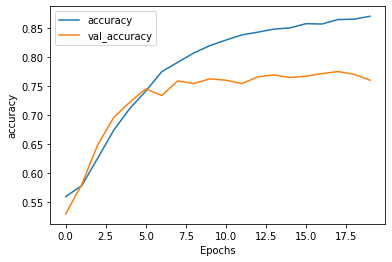

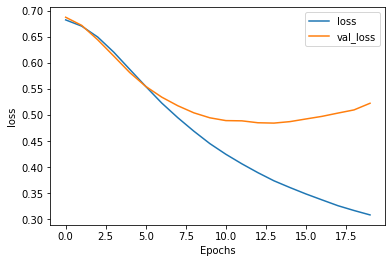

In [15]:
import matplotlib.pyplot as plt


def plot_graphs(history, string):
  plt.plot(history.history[string])
  plt.plot(history.history['val_'+string])
  plt.xlabel("Epochs")
  plt.ylabel(string)
  plt.legend([string, 'val_'+string])
  plt.show()
  
plot_graphs(history, "accuracy")
plot_graphs(history, "loss")

In [16]:
review1 = """I loved this movie"""

review2 = """that was the worst movie I've ever seen"""

review3 = """too much violence even for a Bond film"""

review4 = """a captivating recounting of a cherished myth"""

new_reviews = [review1, review2, review3, review4]

In [20]:
def predict_reviews(model, reviews):
  padding_type = 'post'
  sample_sequences = tokenizer.texts_to_sequences(reviews)
  reviews_padded = pad_sequences(sample_sequences, padding=padding_type, maxlen=max_length)
  classes = model.predict(reviews_padded)
  for x in range(len(reviews_padded)):
    print(reviews[x])
    print(classes[x])
    print('\n')

predict_reviews(model, new_reviews)

I loved this movie
[0.43309513]


that was the worst movie I've ever seen
[0.13707456]


too much violence even for a Bond film
[0.03533623]


a captivating recounting of a cherished myth
[0.64206433]




In [23]:
def fit_model_and_show_results (model, reviews):
  model.summary()
  history = model.fit(training_padded, training_labels_final, epochs=num_epochs, 
                      validation_data=(validation_padded, validation_labels_final))
  plot_graphs(history, "accuracy")
  plot_graphs(history, "loss")
  predict_reviews(model, reviews)

USE CNN

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_2 (Embedding)      (None, 50, 16)            64000     
_________________________________________________________________
conv1d_1 (Conv1D)            (None, 46, 16)            1296      
_________________________________________________________________
global_average_pooling1d_2 ( (None, 16)                0         
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 17        
Total params: 65,313
Trainable params: 65,313
Non-trainable params: 0
_________________________________________________________________
Epoch 1/30
313/313 [==============================] - 1s 4ms/step - loss: 0.6906 - accuracy: 0.5493 - val_loss: 0.6931 - val_accuracy: 0.5092
Epoch 2/30
313/313 [==============================] - 1s 4ms/step - loss: 0.6865 - accuracy: 0.5590 - val_

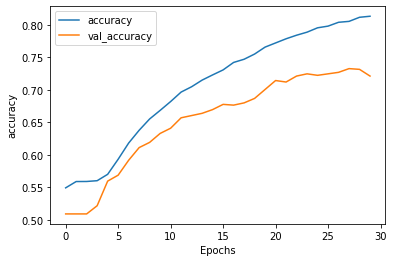

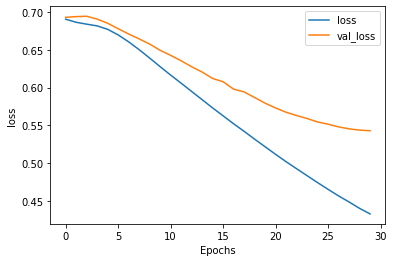

I loved this movie
[0.7394752]


that was the worst movie I've ever seen
[0.3697056]


too much violence even for a Bond film
[0.46644196]


a captivating recounting of a cherished myth
[0.74441916]




In [24]:
num_epochs = 30

model_cnn = tf.keras.Sequential([
   tf.keras.layers.Embedding(vocab_size, embedding_dim, input_length=max_length),
   tf.keras.layers.Conv1D(16, 5, activation='relu'),
   tf.keras.layers.GlobalAveragePooling1D(),
   tf.keras.layers.Dense(1, activation='sigmoid')                              
])

learning_rate = 0.0001
model_cnn.compile(loss='binary_crossentropy',
                  optimizer=tf.keras.optimizers.Adam(learning_rate), 
                  metrics=['accuracy'])

fit_model_and_show_results(model_cnn, new_reviews)

USE GRU

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_3 (Embedding)      (None, 50, 16)            64000     
_________________________________________________________________
bidirectional (Bidirectional (None, 64)                9600      
_________________________________________________________________
dense_3 (Dense)              (None, 1)                 65        
Total params: 73,665
Trainable params: 73,665
Non-trainable params: 0
_________________________________________________________________
Epoch 1/30
313/313 [==============================] - 3s 10ms/step - loss: 0.6899 - accuracy: 0.5582 - val_loss: 0.6935 - val_accuracy: 0.5092
Epoch 2/30
313/313 [==============================] - 3s 9ms/step - loss: 0.6865 - accuracy: 0.5590 - val_loss: 0.6947 - val_accuracy: 0.5092
Epoch 3/30
313/313 [==============================] - 3s 8ms/step - loss: 0.6850 - accuracy: 0.

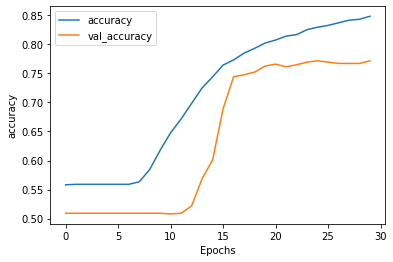

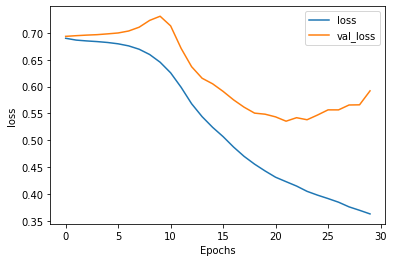

I loved this movie
[0.4812997]


that was the worst movie I've ever seen
[0.17660834]


too much violence even for a Bond film
[0.29846305]


a captivating recounting of a cherished myth
[0.66120034]




In [25]:
num_epochs = 30
model_gru = tf.keras.Sequential([
    tf.keras.layers.Embedding(vocab_size, embedding_dim, input_length=max_length),
    tf.keras.layers.Bidirectional(tf.keras.layers.GRU(32)),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

learning_rate = 0.00003 # slower than the default learning rate
model_gru.compile(loss='binary_crossentropy',
                  optimizer=tf.keras.optimizers.Adam(learning_rate),
                  metrics=['accuracy'])

fit_model_and_show_results(model_gru, new_reviews)

USE Multiple LSTM

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_5 (Embedding)      (None, 50, 16)            64000     
_________________________________________________________________
bidirectional_2 (Bidirection (None, 50, 32)            4224      
_________________________________________________________________
bidirectional_3 (Bidirection (None, 32)                6272      
_________________________________________________________________
dense_4 (Dense)              (None, 1)                 33        
Total params: 74,529
Trainable params: 74,529
Non-trainable params: 0
_________________________________________________________________
Epoch 1/30
313/313 [==============================] - 6s 18ms/step - loss: 0.6824 - accuracy: 0.5617 - val_loss: 0.7295 - val_accuracy: 0.5092
Epoch 2/30
313/313 [==============================] - 5s 15ms/step - loss: 0.5262 - accuracy: 0.7339 - va

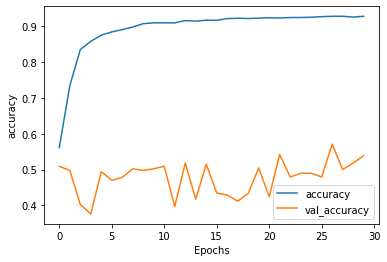

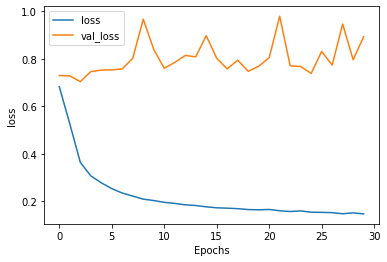

I loved this movie
[0.34116435]


that was the worst movie I've ever seen
[0.18724073]


too much violence even for a Bond film
[0.0145152]


a captivating recounting of a cherished myth
[0.99483335]




In [27]:
num_epochs = 30
model_multiple_bidi_lstm = tf.keras.Sequential([
   tf.keras.layers.Embedding(vocab_size, embedding_dim, input_length= max_length),
   tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(embedding_dim, return_sequences=True)),
   tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(embedding_dim)),
   tf.keras.layers.Dense(1, activation='sigmoid')                                             
])

learning_rate =0.0003
model_multiple_bidi_lstm.compile(loss='binary_crossentropy', optimizer = tf.keras.optimizers.Adam(learning_rate), metrics=['accuracy'])
fit_model_and_show_results(model_multiple_bidi_lstm, new_reviews)

In [28]:
# Write some new reviews 

review1 = """I loved this movie"""

review2 = """that was the worst movie I've ever seen"""

review3 = """too much violence even for a Bond film"""

review4 = """a captivating recounting of a cherished myth"""

review5 = """I saw this movie yesterday and I was feeling low to start with,
 but it was such a wonderful movie that it lifted my spirits and brightened 
 my day, you can\'t go wrong with a movie with Whoopi Goldberg in it."""

review6 = """I don\'t understand why it received an oscar recommendation
 for best movie, it was long and boring"""

review7 = """the scenery was magnificent, the CGI of the dogs was so realistic I
 thought they were played by real dogs even though they talked!"""

review8 = """The ending was so sad and yet so uplifting at the same time. 
 I'm looking for an excuse to see it again"""

review9 = """I had expected so much more from a movie made by the director 
 who made my most favorite movie ever, I was very disappointed in the tedious 
 story"""

review10 = "I wish I could watch this movie every day for the rest of my life"

more_reviews = [review1, review2, review3, review4, review5, review6, review7, 
               review8, review9, review10]


In [30]:
print("============================\n","Embeddings only:\n", "============================")
predict_reviews(model, more_reviews)

 Embeddings only:
I loved this movie
[0.43309513]


that was the worst movie I've ever seen
[0.13707456]


too much violence even for a Bond film
[0.03533623]


a captivating recounting of a cherished myth
[0.64206433]


I saw this movie yesterday and I was feeling low to start with,
 but it was such a wonderful movie that it lifted my spirits and brightened 
 my day, you can't go wrong with a movie with Whoopi Goldberg in it.
[0.29148966]


I don't understand why it received an oscar recommendation
 for best movie, it was long and boring
[0.5217359]


the scenery was magnificent, the CGI of the dogs was so realistic I
 thought they were played by real dogs even though they talked!
[0.2914488]


The ending was so sad and yet so uplifting at the same time. 
 I'm looking for an excuse to see it again
[0.5519853]


I had expected so much more from a movie made by the director 
 who made my most favorite movie ever, I was very disappointed in the tedious 
 story
[0.01139724]


I wish I cou

In [31]:
print("============================\n","With CNN\n", "============================")
predict_reviews(model_cnn, more_reviews)

 With CNN
I loved this movie
[0.7394752]


that was the worst movie I've ever seen
[0.3697056]


too much violence even for a Bond film
[0.46644196]


a captivating recounting of a cherished myth
[0.74441916]


I saw this movie yesterday and I was feeling low to start with,
 but it was such a wonderful movie that it lifted my spirits and brightened 
 my day, you can't go wrong with a movie with Whoopi Goldberg in it.
[0.23691967]


I don't understand why it received an oscar recommendation
 for best movie, it was long and boring
[0.31215283]


the scenery was magnificent, the CGI of the dogs was so realistic I
 thought they were played by real dogs even though they talked!
[0.24818367]


The ending was so sad and yet so uplifting at the same time. 
 I'm looking for an excuse to see it again
[0.6197355]


I had expected so much more from a movie made by the director 
 who made my most favorite movie ever, I was very disappointed in the tedious 
 story
[0.02476579]


I wish I could watch

In [32]:
print("===========================\n","With bidirectional GRU\n", "============================")
predict_reviews(model_gru, more_reviews)

 With bidirectional GRU
I loved this movie
[0.4812997]


that was the worst movie I've ever seen
[0.17660834]


too much violence even for a Bond film
[0.29846305]


a captivating recounting of a cherished myth
[0.66120034]


I saw this movie yesterday and I was feeling low to start with,
 but it was such a wonderful movie that it lifted my spirits and brightened 
 my day, you can't go wrong with a movie with Whoopi Goldberg in it.
[0.11245748]


I don't understand why it received an oscar recommendation
 for best movie, it was long and boring
[0.11275186]


the scenery was magnificent, the CGI of the dogs was so realistic I
 thought they were played by real dogs even though they talked!
[0.14733051]


The ending was so sad and yet so uplifting at the same time. 
 I'm looking for an excuse to see it again
[0.26348376]


I had expected so much more from a movie made by the director 
 who made my most favorite movie ever, I was very disappointed in the tedious 
 story
[0.07926037]


I wi

In [34]:
print("===========================\n", "With multiple bidirectional LSTM:\n", "==========================")
predict_reviews(model_multiple_bidi_lstm, more_reviews)

 With multiple bidirectional LSTM:
I loved this movie
[0.34116438]


that was the worst movie I've ever seen
[0.18724073]


too much violence even for a Bond film
[0.0145152]


a captivating recounting of a cherished myth
[0.99483335]


I saw this movie yesterday and I was feeling low to start with,
 but it was such a wonderful movie that it lifted my spirits and brightened 
 my day, you can't go wrong with a movie with Whoopi Goldberg in it.
[0.01256666]


I don't understand why it received an oscar recommendation
 for best movie, it was long and boring
[0.99621284]


the scenery was magnificent, the CGI of the dogs was so realistic I
 thought they were played by real dogs even though they talked!
[0.99522287]


The ending was so sad and yet so uplifting at the same time. 
 I'm looking for an excuse to see it again
[0.99198747]


I had expected so much more from a movie made by the director 
 who made my most favorite movie ever, I was very disappointed in the tedious 
 story
[0.01234